In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sys; sys.path.append('..')
from sgr_tools.ScenarioGeneration.Parametric.Forecast.Models import ARX
from sgr_tools.ScenarioGeneration.Parametric.Forecast.Tools import Splines
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
n = 8760
idx = pd.date_range(start="2020-01-01", periods=n, freq="H")

heat_load = pd.Series(
    sm.tsa.ArmaProcess(
        np.r_[1, -np.random.rand(1)],
        np.r_[1, -np.random.rand(1)],
    ).generate_sample(nsample=n),
    index=idx,
)


bs_df = 4
exog = Splines(seasonality=24, degrees_freedom=bs_df).get_fit(idx=heat_load.index)

/var/folders/_0/pycjxcpn11j1k41mjdskw2rc0000gn/T/ipykernel_72275/3881496995.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  idx = pd.date_range(start="2020-01-01", periods=n, freq="H")


In [3]:
y = heat_load

n_train = 168 * 6
n_test = 168 * 1

t_test = y.index[n_train : n_train + n_test]
t_train = y.index[:n_train]

exog_train = exog.loc[t_train, :]
exog_test = exog.loc[t_test, :]

y_train = y.loc[t_train]
y_test = y.loc[t_test]

arx = ARX()
arx.fit(y_train=y_train, exog_train=exog_train, lags=[1])

In [4]:
n_scen = 5
np.random.seed(1494)
scenarios = arx.simulate_scenarios(y0=y_train[-1], exog=exog_test, n_scen=n_scen, t_range=t_test, threads=-1)

/var/folders/_0/pycjxcpn11j1k41mjdskw2rc0000gn/T/ipykernel_72275/2814220696.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  scenarios = arx.simulate_scenarios(y0=y_train[-1], exog=exog_test, n_scen=n_scen, t_range=t_test, threads=1)


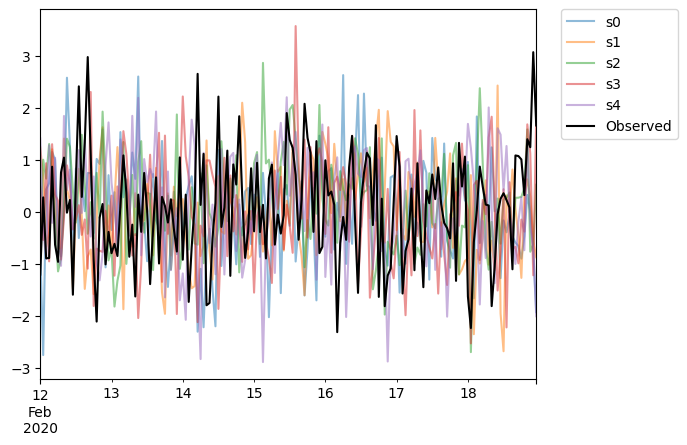

In [5]:
ax = scenarios.plot(alpha=0.5, legend=False)

y_test.plot(ax=ax, color='black', label='Observed')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)